# Chapter 14: Regression Diagnostics and Structure 
# Use Case: Profit Forecasting, Steps for a Safety-first Linear Regression 
# =======================
Dataset: https://www.kaggle.com/datasets/farhanmd29/50-startups

First we load the packages we will use

In [10]:
# package for working with tabular data
import pandas as pd 
import numpy as np

# Package for charting
import matplotlib.pyplot as plt
import seaborn as sns #charts

# package for timing runtime
import time

# package for navigating the operating system
import os

Load in CSV data: Let us start by loading all the data

In [11]:
# deal with datetime in the csv...
mydateparser = lambda x: pd.datetime.strptime(x, 'm%/d%/y%')
# Upload
df = pd.read_csv("../data/50_Startups.csv", header=0) # Note that we are loading in the csv not specifying an index, df will have an identity index
df.fillna(0)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


We are looking at a simple dataset from startups in New York, California and Florida about 50 business Startups "17 in each state". In the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

### CHECK 1: Data Exploration

As we have seen in previous chapters we can conduct pairwise plots and other approaches to explore the distributions and relationships within a dataset

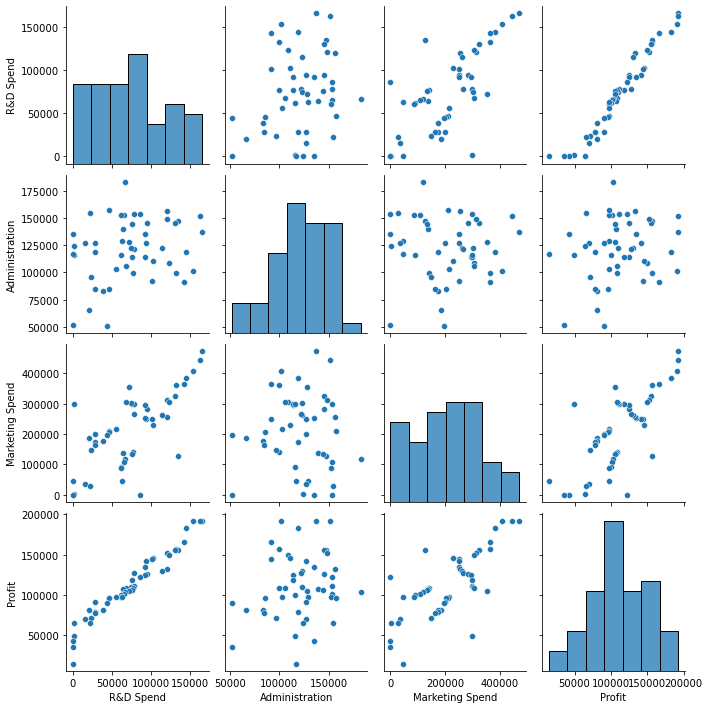

In [14]:
sns.pairplot(df)

### CHECK 2: Colinearity

Check correlations of each of the variables. A correlation between your independent variables is a problem, and may cause unstable coefficients (as the job of one correlated input could potentially do the other's which could dramatically change these coefficients when you rerun the models)
We will use a rule of thumb that no 2 variables should have a correlation coefficient of >0.5

In [15]:
df_train = df
df_train[['R&D Spend', 'Administration','Marketing Spend']].corr()

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.241955,0.724248
Administration,0.241955,1.000000,-0.032154
Marketing Spend,0.724248,-0.032154,1.000000


<AxesSubplot:>

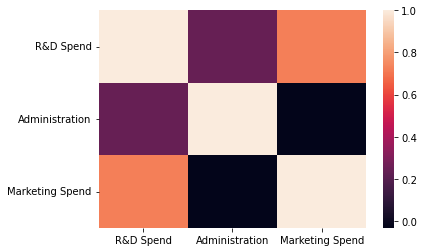

In [16]:
# plot the heatmap
sns.heatmap(df_train[['R&D Spend', 'Administration','Marketing Spend']].corr())

In [17]:
#Use scipy to get the correlation coefficient
from scipy.stats import pearsonr

def corrl_with_pvals(df: pd.DataFrame):
    #Get the correlation matrix
    corr = df.corr()
    # construct a new matrix which has the p-val of each correlation coefficient
    pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr.shape)

    # ow construct our correlation matrix, with *** for 1% significance levcorr
    p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
    corr_p = corr.round(2).astype(str) + p

    print(corr_p)
    
# Get correl matrix with pval *s
corrl_with_pvals(df_train[['R&D Spend', 'Administration','Marketing Spend']])

                R&D Spend Administration Marketing Spend
R&D Spend          1.0***          0.24*         0.72***
Administration      0.24*         1.0***           -0.03
Marketing Spend   0.72***          -0.03          1.0***


Do we have a problem? We have 2 colinear variables 'Marketing Spend' and 'R&D Spend' with a correlation coefficient of 0.72.

### Fixing colinearities: differencing

To reduce correlations between input variables we can take colinear variables and either deduct one from the other, or divide one by the other.
Here we deduct 'Marketing Spend' by 'R&D Spend'. This is a quick fix...

In [18]:
#Create a copy of th edata frame (not just reasignment)
df_train_dif = df_train.copy(deep=True)

#Overweight Mareting SPending with a differenced series
df_train_dif['Marketing Spend'] = df_train_dif['Marketing Spend'] - df_train_dif['R&D Spend']

#Redo the corrl with p *s...
corrl_with_pvals(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']])

                R&D Spend Administration Marketing Spend
R&D Spend          1.0***          0.24*         0.45***
Administration      0.24*         1.0***           -0.16
Marketing Spend   0.45***          -0.16          1.0***


p-values still show statistically significant correlation coefficients but they are now below 0.5

In [19]:
# Run smple correlation matrix too
print("After Differencing Marketing Spend")
df_train_dif[['R&D Spend', 'Administration','Marketing Spend']].corr()

After Differencing Marketing Spend


,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.241955,0.451477
Administration,0.241955,1.000000,-0.159130
Marketing Spend,0.451477,-0.159130,1.000000


### Linear model of Profit 

Separate the companies we will learn the linear model for and the 3 companies that we will assess

Stats packge we will be using

In [20]:
#Key library we will use for the linear models is...
import statsmodels.api as sm

In [21]:
# Instantiate an OLS model from statsmodels 
lm = sm.OLS(df_train_dif['Profit'], df_train_dif[['R&D Spend', 'Administration','Marketing Spend']])   

# Now fit the OLS model... 
model = lm.fit()   

#Get the summary stats of the regression model 
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):                    1.17e-44
Time:                        09:56:26   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8001      0.051     15.719      0.000       0.698       0.903
Administration      0.3277      0.031     10.458      0.000       0.265       0.391
Marketing Spend     0.0822      0.022      3.733      0.001       0.038       0.126
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                          -0.126   Prob(JB):                        0.688
Kurtosis:                       2.456   Cond. No.                         6.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CHECK3: Check the model fit

Carry out a multipoint check of the regression results..... firstly a plot of the fit. Does it look ok?

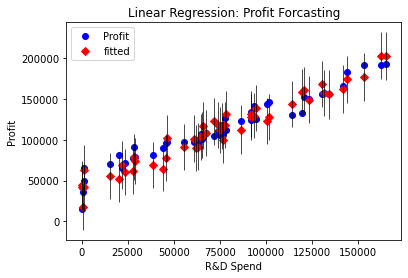

<Figure size 720x720 with 0 Axes>

In [22]:
# Regression plot 
fig, ax = plt.subplots() 
fig = sm.graphics.plot_fit(model, 0, ax=ax)  

# Set the figure size 
plt.figure(figsize=(10, 10)) 

ax.set_title("Linear Regression: Profit Forcasting") 

plt.show() 

Model fit ok?

In [23]:
# Get the fit object....
results = lm.fit()

# rule of thumb, and depending on how noisy the data is... 
if results.rsquared_adj > 0.7: print('AdjR2 > 0.7: Check')
elif results.rsquared_adj > 0.5: print('AdjR2 > 0.7: Weak')
else: {print('R2: Problem')}

AdjR2 > 0.7: Check


In [24]:
# Overall fit of the model: F-test
if results.f_pvalue < 0.05: print('Model fit (F-test): Check')
elif results.f_pvalue < 0.1: print('Model fit (F-test): Weak')
else: print('Model fit (F-test): Weak')

Model fit (F-test): Check


Coefficients?

### CHECK 4: Check the Residuals 

We are look for patterns, skews and anything other than randomness that would indicate problems with our model

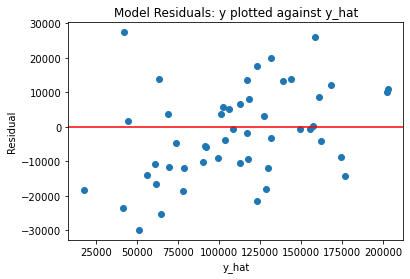

In [25]:
#Calculat the residuals:
y_pred = model.predict()
residuals = model.predict() - df_train['Profit']
plt.scatter(y_pred,residuals)

plt.title("Model Residuals: y plotted against y_hat")
plt.axhline(0, color='red') 

plt.xlabel("y_hat") 
plt.ylabel("Residual") 

plt.show()

(array([1., 2., 2., 3., 6., 5., 5., 6., 4., 4., 4., 4., 1., 1., 2.]),
 array([-29869.38453547, -26053.70057028, -22238.0166051 , -18422.33263991,
        -14606.64867473, -10790.96470954,  -6975.28074435,  -3159.59677917,
           656.08718602,   4471.7711512 ,   8287.45511639,  12103.13908158,
         15918.82304676,  19734.50701195,  23550.19097713,  27365.87494232]),
 <BarContainer object of 15 artists>)

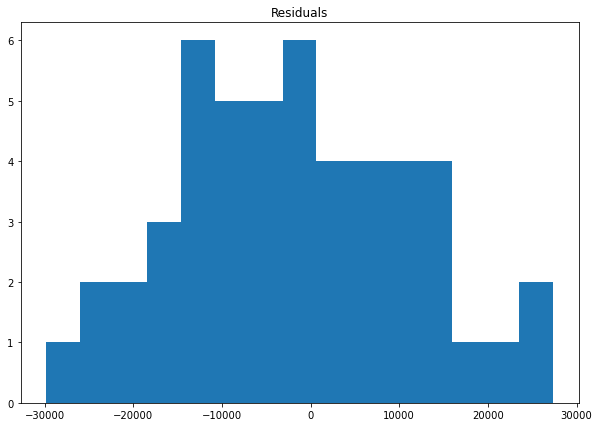

In [26]:
# frequency distribution of residuals
plt.figure(figsize=(10,7)) 
plt.title('Residuals') 
plt.hist(residuals, bins=15) 

Now do a test of normality... are the residuals. 
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [27]:
#Use scipy to get the correlation coefficient
from scipy import stats

# Normality test
results = stats.shapiro(residuals)
    
# Overall fit of the model: F-test
if results.pvalue < 0.9: print('Residuals are normally distributed): Check')
elif (1-results.pvalue)  < 0.95: print('Residuals are normally distributed: Weak')
else: print('Residuals are normally distributed: Problem')
    
print("(Normality test: " + str(results.statistic) + ", p-val " + str(1-results.pvalue) +")")

Residuals are normally distributed: Weak
(Normality test: 0.9898763298988342, p-val 0.056751251220703125)


In [28]:
from scipy import stats
rng = np.random.default_rng()
x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)
shapiro_test = stats.shapiro(x)
shapiro_test.statistic
shapiro_test.pvalue

0.8598434925079346

(array([ 1.,  3.,  2.,  5.,  7.,  8., 18., 10., 14., 11.,  8.,  5.,  3.,
         2.,  3.]),
 array([-2.675022  , -1.69271162, -0.71040125,  0.27190912,  1.25421949,
         2.23652986,  3.21884024,  4.20115061,  5.18346098,  6.16577135,
         7.14808173,  8.1303921 ,  9.11270247, 10.09501284, 11.07732321,
        12.05963359]),
 <BarContainer object of 15 artists>)

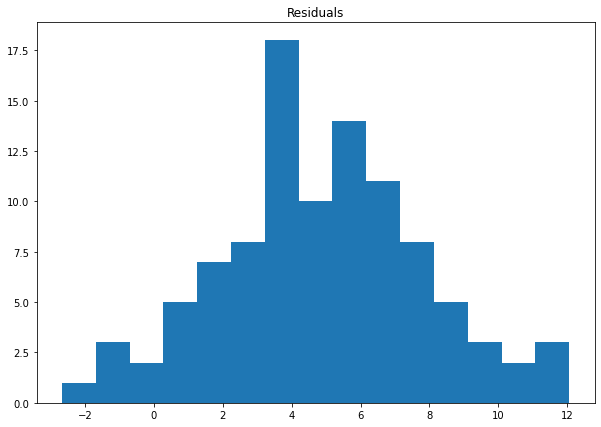

In [29]:
# frequency distribution of residuals
plt.figure(figsize=(10,7)) 
plt.title('Residuals') 
plt.hist(x, bins=15) 

## Recursive Feature Elmination

We will now use Recursive Feature Elimination (RFE), to automatically choose our features. And we will use the Sklearn implementation RFECV.

Recursive Feature Elimination (RFE), refinesd a model by removing the least important independent variables. This assesses the performance of different independent variables in relation to different samples of our input data (cross validation).

We use SKlearns implemetation of OLS regression, then instantiate an RFE object, fit this,  

SKlearn has an implementation that you can use with different types of learner (estimator), but here we will just use OLS regression.

In [30]:
# set up our regressor. Today we shall be using the random forest
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']],df_train_dif['Profit'])

Recursive feature elimination is an example of backward feature elimination in which we essentially first fit our model using all the features in a given set, then progressively one by one we remove the least significant features, each time re-fitting, until we are left with the desired number of features, which is set by the parameter n_features_to_select.

### Different models using different independent variables

In [31]:
df_train_dif.iloc[1]

R&D Spend            162597.7
Administration      151377.59
Marketing Spend     281300.83
State              California
Profit              191792.06
Name: 1, dtype: object

In [32]:
# perform a scikit-learn Recursive Feature Elimination (RFE) to find the "best" model
from sklearn.feature_selection import RFE
# Calc R2 too
from sklearn.metrics import r2_score    

# Run RFE but for a given number of features.
def run_ref_for_n_features(df_train_dif: pd.DataFrame, reg, n_features_to_select: int = 1) -> object:
    # Pass our ols model, into RFECV, to get a model of best fit.
    rfe = RFE(estimator=reg,  n_features_to_select=n_features_to_select)
    # fit the model.
    rfe_mod = rfe.fit(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']],df_train_dif['Profit'])
    return rfe_mod

Now find the best models for 1, then 2, then 3 features.

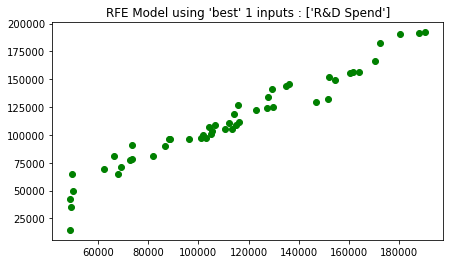

R2 = 0.9465353160804393


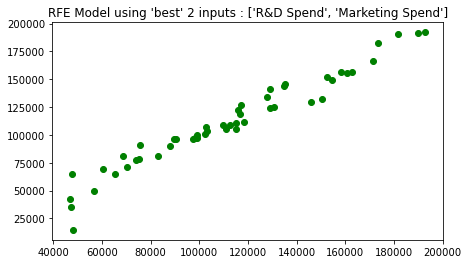

R2 = 0.9504503015559763


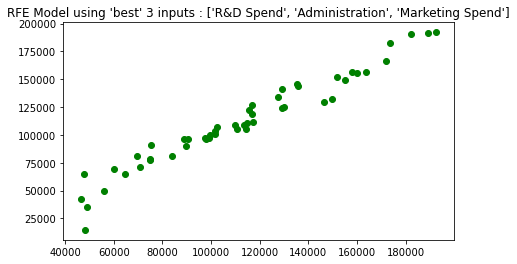

R2 = 0.9507459940683246


In [33]:
# Get the indpedent variables we are using
X = df_train_dif[['R&D Spend', 'Administration','Marketing Spend']]

# Construct the best 1 factor OLS model, then the best 2 factor, the 3 ...
for i in range(0,X.shape[1]):
    #Run the function that generates the rfe_mod model for n independents
    rfe_mod = run_ref_for_n_features(df_train_dif, reg, i+1)    
    
    # y and y_hat
    y = df_train_dif['Profit']
    y_hat = rfe_mod.predict(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']])
    
    #Columns selected by RFE?    
    cols = X.columns[rfe_mod.support_]
    
    #Chart  
    plt.figure(figsize=(7,4))
    plt.title("RFE Model using 'best' " + str(i+1) + " inputs : " + str([cols[i] for i in range(cols.__len__())]))
    plt.scatter(y_hat, y,color='g')
    plt.show()  
    
    #Get R2 for the regression model
    print("R2 = " + str(r2_score(y, y_hat)))

## Let RFE Find the Best model

In [35]:
from sklearn.feature_selection import RFECV
#OLS...
reg = LinearRegression().fit(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']],df_train_dif['Profit'])

# Pass our ols model, into RFECV, to get a model of best fit.
rfecv_mod = RFECV(estimator=reg)
# fit the model.
rfecv_mod = rfecv_mod.fit(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']],df_train_dif['Profit'])

Regression lines plot for each model

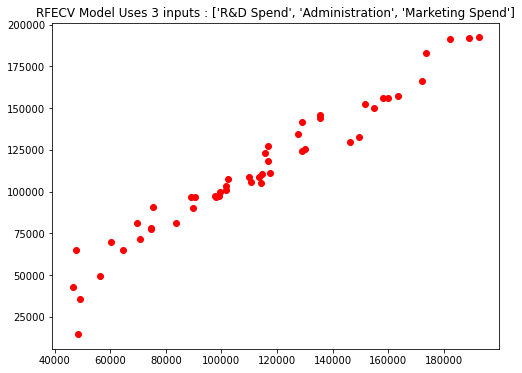

R2 = 0.9507459940683246


In [36]:
#Columns selected by RFE?    
cols = X.columns[rfecv_mod.support_]

#Predict
y = df_train_dif['Profit']
y_hat = rfecv_mod.predict(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']])

#Chart  
plt.figure(figsize=(8,6))
plt.title("RFECV Model Uses " + str(i+1) + " inputs : " + str([cols[i] for i in range(cols.__len__())]))
plt.scatter(y_hat, y,color='r')
plt.show()  

#Get R2 for the regression model
print("R2 = " + str(r2_score(y, y_hat)))

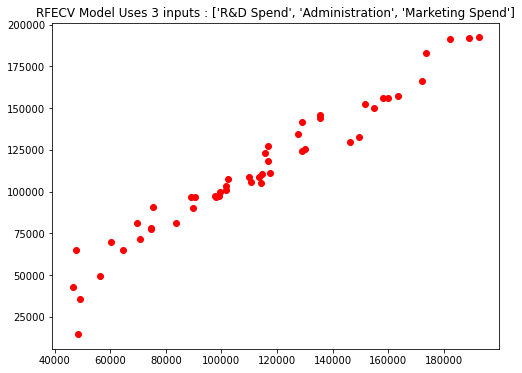

R2 = 0.9507459940683246


In [37]:
 
# perform a scikit-learn Recursive Feature Elimination (RFE) to find the "best" model
from sklearn.feature_selection import RFE
# Calc R2 too
from sklearn.metrics import r2_score 
 
#OLS...
reg = LinearRegression().fit(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']],df_train_dif['Profit'])
 
# Pass our ols model, into RFECV, to get a model of best fit.
rfecv_mod = RFECV(estimator=reg)
# fit the model.
rfecv_mod = rfecv_mod.fit(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']],df_train_dif['Profit'])
 
#Columns selected by RFE?   
cols = X.columns[rfecv_mod.support_]
 
#Predict
y = df_train_dif['Profit']
y_hat = rfecv_mod.predict(df_train_dif[['R&D Spend', 'Administration','Marketing Spend']])
 
#Chart 
plt.figure(figsize=(8,6))
plt.title("RFECV Model Uses " + str(i+1) + " inputs : " + str([cols[i] for i in range(cols.__len__())]))
plt.scatter(y_hat, y,color='r')
plt.show() 
 
#Get R2 for the regression model
print("R2 = " + str(r2_score(y, y_hat)))
 